<a href="https://colab.research.google.com/github/cristiang26/Laboratorio-Senales/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*PRIMER LABORATORIO DE SEÑALES*

##Librerias:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install wfdb   #Instalacion en colab
import wfdb
#pip install wfdb #Instalacion en python instalado
import pandas as pd


numpy: Librería para cálculos numéricos y manejo de arreglos (vectores y matrices).

matplotlib.pyplot: Sirve para generar gráficos y visualizar datos.

wfdb: Librería especializada para leer y manipular señales biomédicas del formato PhysioNet, como ECG.

pandas: Manejo de datos en forma de tablas (aunque aquí solo se importa, no se usa mucho).


In [ ]:
wfdb.dl_database('mitdb', dl_dir='mitdb', records=['100']) # Descargamos la base de datos de mitdb con el record 100

record = wfdb.rdrecord('mitdb/100', sampto=60*360) # Creamos el objeto record usando la medicion mitdb/100


Generating record list for: 100
Generating list of all files for: 100
Finished downloading files


 wfdb.dl_database: descarga registros desde PhysioNet.

'mitdb': es el nombre de la base de datos (MIT-BIH Arrhythmia Database).

dl_dir='mitdb': indica la carpeta donde se guardará.

records=['100'] significa que solo se descarga el registro número 100 (cada registro es un paciente).

**PARTTE A**

# Grafica señal MLII


21600


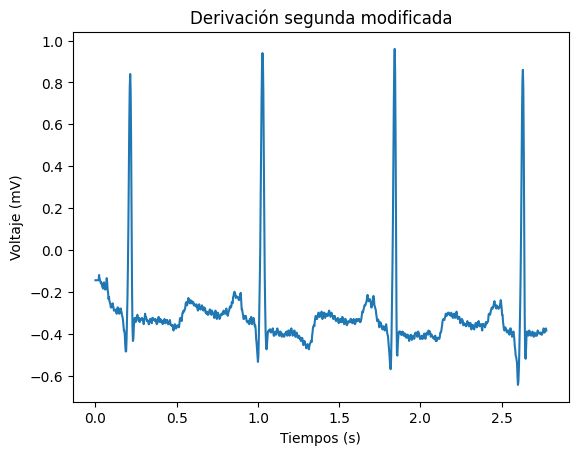

In [ ]:

signals = record.p_signal # Transformamos record al array signals
MliiSignal = signals[:,0] # Escogemos solo la señal de la columna 0

fs = 360 #Definimos fs (Frecuencia de muestreo)
nSamples  = 360*60 # Calculamos la cantidad de muestras para 60 segundos
t = [] #Creamos array vacio

for i in range(nSamples):
  tiempo = i * (1 / fs) #Multiplicamos i * Periodo de muestreo
  t.append(tiempo) #agregamos a t

print(len(t))

plt.title("Derivación segunda modificada")
plt.xlabel("Tiempos (s)")
plt.ylabel("Voltaje (mV)")
plt.plot(t[0:1000],MliiSignal[0:1000])



fs (frecuencia de muestreo) indica cuántas veces por segundo medimos la señal.

Según el teorema de Nyquist, para capturar correctamente una señal de frecuencia máxima f_max, necesitamos fs ≥ 2·f_max.

En ECG, la mayor parte de la energía está por debajo de 150 Hz, por eso 360 Hz es más que suficiente.

nSamples nos dice cuántos datos hay en un minuto.

t es el vector de tiempo en segundos, necesario para graficar la señal correctamente.





En ECG, cada ciclo cardíaco tiene:

Onda P: despolarización auricular.

Complejo QRS: despolarización ventricular (pico R muy marcado).

Onda T: repolarización ventricular.

Graficamos solo las primeras 1000 muestras (~2.77 s) para poder distinguir bien estas formas de onda.

Un minuto entero sería muy comprimido y poco legible.

# Calculo de variables estadisticas

## Media

In [ ]:
# Tenemos MliiSignal y t

acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + i

media = acumulador/nSamples

print("Media:", media)


Media: -0.33634791666666564


La media aritmética de una señal es su valor promedio a lo largo del tiempo.

En un ECG bien centrado, la media debería estar cerca de cero si no hay drift o desplazamiento de línea base.

## Desviación estándar

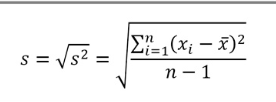

In [ ]:
# Tenemos MliiSignal y t

acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + (i - media)**2

varianza = acumulador/(nSamples - 1)
sd = varianza**(0.5)

print("Desviación Estandar:", sd)

Desviación Estandar: 0.17561972579326307


Es la raíz cuadrada de la varianza.

Expresa la dispersión en las mismas unidades que la señal (milivoltios), lo que la hace más interpretable.

Valores más altos indican mayor variabilidad de voltaje en el ECG, lo que puede deberse a picos pronunciados o ruido.

## Coeficiente de variación

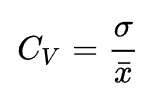

In [ ]:
Cv= sd/(media)
print("Coeficiente de variación:",Cv)

Coeficiente de variación: -0.5221370999818301




Es una medida adimensional que indica la dispersión relativa respecto a la media.

Útil para comparar la variabilidad entre señales que pueden tener diferentes escalas de voltaje

## Histograma


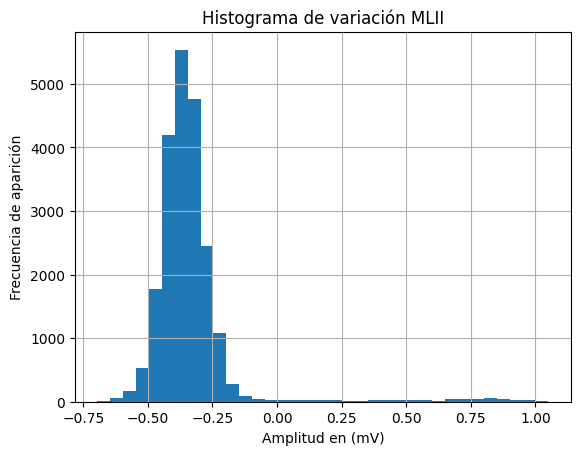

In [ ]:
plt.hist(MliiSignal,bins=35)
plt.title("Histograma de variación MLII")
plt.xlabel("Amplitud en (mV)")
plt.ylabel("Frecuencia de aparición")
plt.grid(True)

Un histograma es una representación gráfica que muestra cómo se distribuyen los valores de la señal.

Divide el rango de valores en intervalos (bins) y cuenta cuántos datos caen en cada uno.

Matemáticamente es una estimación de la función de densidad de probabilidad de los datos.

En ECG:

Sirve para:

Ver si la señal está centrada en cero (línea base estable).

Detectar saturaciones o desplazamientos.

Analizar el rango dinámico de la señal.

##Función de probabilidad

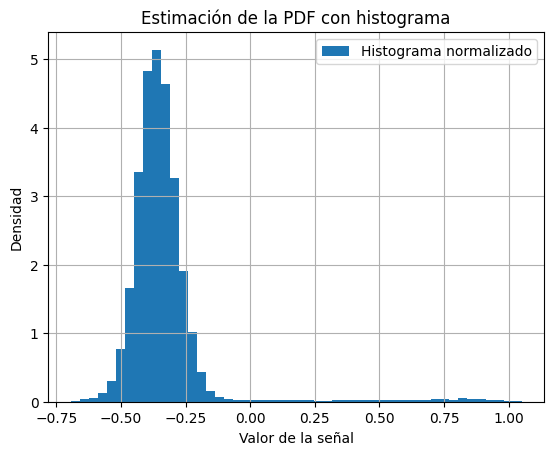

In [ ]:
plt.hist(MliiSignal, bins=50, density=True, label='Histograma normalizado')
plt.title('Estimación de la PDF con histograma')
plt.xlabel('Valor de la señal')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

##Curtosis
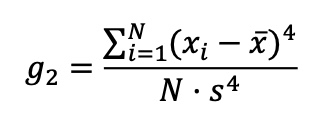

In [ ]:
acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + (i - media)**4

g2= acumulador/(nSamples*sd**4)-3
print("Curtosis:",g2)
print("Leptocúrtica")



Curtosis: 26.565687328943497
Leptocúrtica


Es la raíz cuadrada de la varianza.

Expresa la dispersión en las mismas unidades que la señal (milivoltios), lo que la hace más interpretable.

Valores más altos indican mayor variabilidad de voltaje en el ECG, lo que puede deberse a picos pronunciados o ruido

#Resolución con Funciones

Media: -0.33634791666666664
Desviación estándar: 0.17561566047477958
Coeficiente de variación: -0.5221250133349905


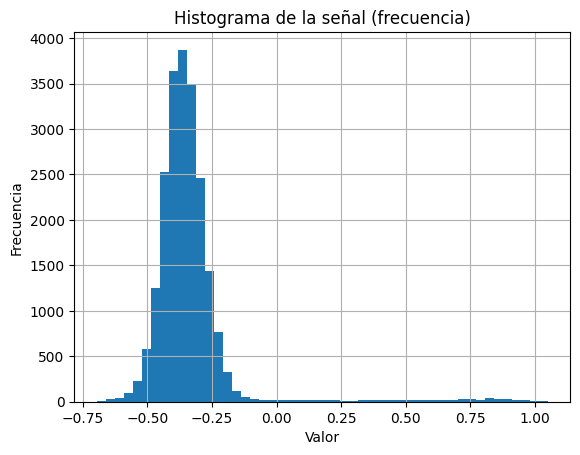

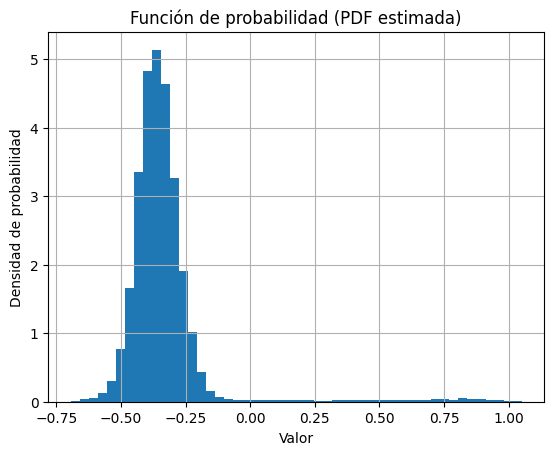

Curtosis (exceso): 26.568425082705314


In [ ]:
from scipy.stats import kurtosis
MliiSignal = np.array(MliiSignal)

# a. Media de la señal
media = np.mean(MliiSignal)
print("Media:", media)

# b. Desviación estándar
desviacionStd = np.std(MliiSignal)
print("Desviación estándar:", desviacionStd)

# c. Coeficiente de variación
coefVar = desviacionStd / media
print("Coeficiente de variación:", coefVar)

# d. Histograma (frecuencia)
plt.hist(MliiSignal, bins=50)
plt.title('Histograma de la señal (frecuencia)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# e. Función de probabilidad (PDF estimada)
plt.hist(MliiSignal, bins=50, density=True)
plt.title('Función de probabilidad (PDF estimada)')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

# f. Curtosis (exceso, ya incluye el -3)
curtosisValor = kurtosis(MliiSignal)
print("Curtosis (exceso):",curtosisValor)

**PARTE B**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb   #Instalacion en colab
import wfdb

In [ ]:
wfdb.dl_database('mitdb', dl_dir='mitdb', records=['100']) # Descargamos la base de datos de mitdb con el record 100

record = wfdb.rdrecord('mitdb/100', sampto=60*360) # Creamos el objeto record usando la medicion mitdb/100

Generating record list for: 100
Generating list of all files for: 100
Created local base download directory: mitdb
Finished downloading files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'record_name': '27', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 43201, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['\\muV 0 0 -10745 27127 0', '\\muV 0 0 7202 17283 0'], 'p_signal': array([[-0.91497116, -0.63999374],
       [-0.9249968 , -0.65000511],
       [-0.9249968 , -0.62998238],
       ...,
       [-1.0199765 , -0.43997604],
       [-1.04002777, -0.4550193 ],
       [-1.04997803, -0.45999878]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['27.dat', '27.dat'], 'fmt': ['16', '16'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [13265.9919, 19078.3115], 'baseline': [1393, 19412], 'units': ['mV', 'mV'], 'adc_res': [None, None], 'adc_zero': [None, None], 'init_value': [None, None], 'checksum': [None, None], 'block_size': [None, 

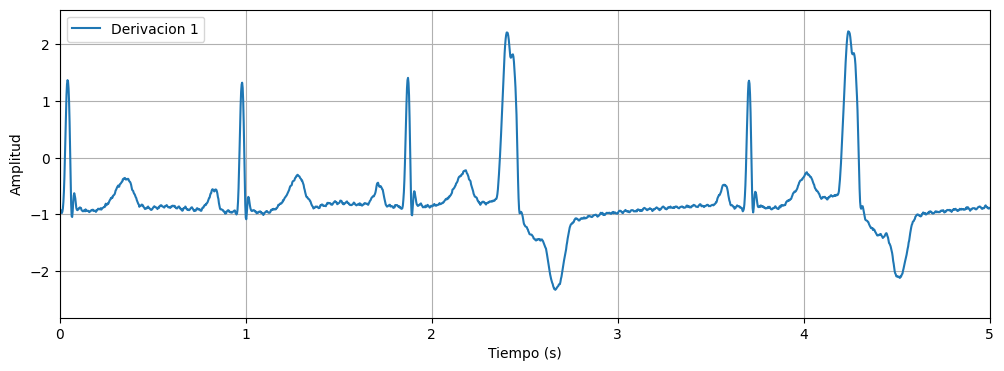

In [ ]:
# Poder traer archivos de Drive
from google.colab import drive
drive.mount('/content/drive')

import wfdb
import matplotlib.pyplot as plt

nombre_base= '/content/drive/MyDrive/Generador de señales/27'

# leer el registro
record = wfdb.rdrecord(nombre_base)
# Mostrar informacion del registro
print(record.__dict__)

# Extraer señal como array
signals = record.p_signal# Matriz [muestras x derivaciones]
fs = record.fs # Frecuencia de muestreo
nSamples = signals.shape[0] # Numero de muestras

#crea eje de tiempo
t = [i*(1/fs) for i in range(nSamples)]

# Graficar primera derivacion
plt.figure(figsize=(12,4))
plt.plot(t, signals[:,0], label='Derivacion 1')
plt.xlim(0,5) # Mostrar de 0 a 5 segundos
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

Media

In [ ]:
import numpy as np

# Seleccionar la señal de la primera derivacion
MliiSignal = signals[:,0]

#calcular media
acumulador = 0
n = len(MliiSignal)#cantidades de muestras

for muestra in MliiSignal:
  acumulador = acumulador + muestra

media_manual = acumulador/n
print("Media:", media_manual)

Media: -0.7487636783019784


Desviacion estandar

In [ ]:
# Tenemos MliiSignal y t

acumulador1 = 0
for i in MliiSignal:
  acumulador1 = acumulador1 + (i - media_manual)**2

  varianza = acumulador1/(n-1)
  desviacionStd = np.sqrt(varianza)

print("Desviacion estandar:", desviacionStd)

Desviacion estandar: 0.5891284657461237


Coeficiente de Variacion

In [ ]:
Cv = desviacionStd/media_manual
print("Coeficiente de variacion:", Cv)

Coeficiente de variacion: -0.7868016075273974


Histogramas

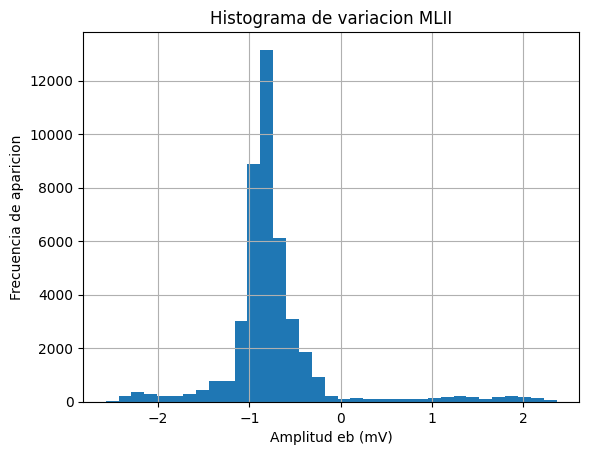

In [ ]:
plt.hist(MliiSignal, bins=35)
plt.title('Histograma de variacion MLII')
plt.xlabel('Amplitud eb (mV)')
plt.ylabel('Frecuencia de aparicion')
plt.grid(True)
plt.show()

Funcion de probabilidad

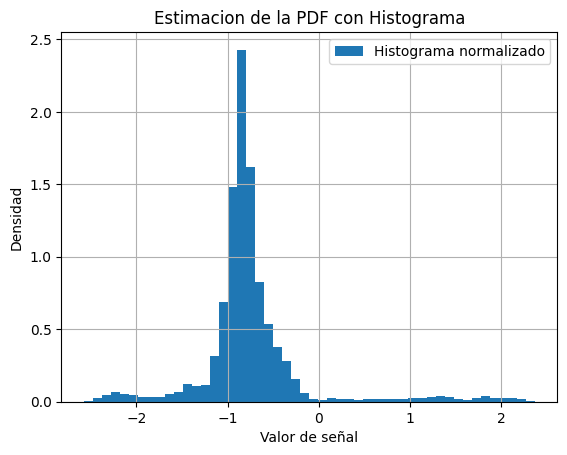

In [ ]:
plt.hist(MliiSignal, bins=50, density=True, label='Histograma normalizado')
plt.title('Estimacion de la PDF con Histograma')
plt.xlabel('Valor de señal')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

Curtosis

In [ ]:
Acumulador2 = 0
for i in MliiSignal:
  Acumulador2 = Acumulador2 + (i - media_manual)**4

g2= Acumulador2/(n*desviacionStd**4)-3
print("Curtosis:",g2)
print("Leptocúrtica")


Curtosis: 9.10552706319006
Leptocúrtica


**Parte C**

Ruido Gaussiano

SNR en dB: 13.592111934221746


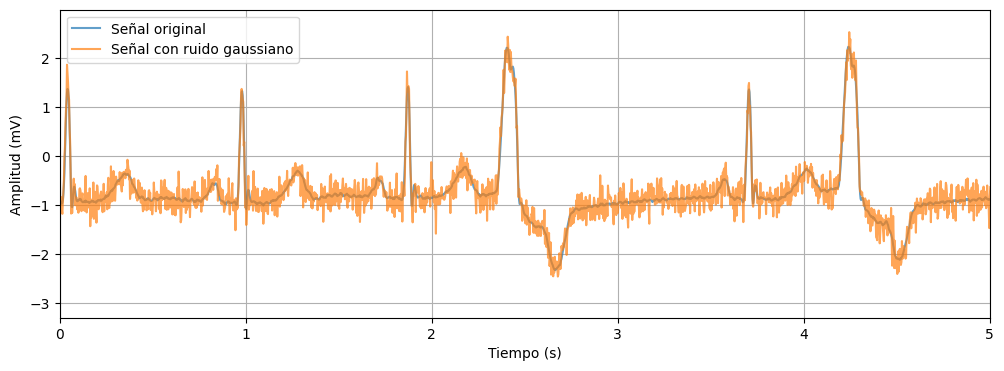

In [ ]:
# Parametro del ruido
media_ruido = 0 # media del ruido
desv_ruido = 0.2 # desviacion estandar del ruido

# Generar ruido gaussiano con la misma longitud de la señal
ruido_gauss = np.random.normal(media_ruido, desv_ruido, len(MliiSignal))

# Señal con ruido
signal_ruidosa = MliiSignal + ruido_gauss

#Graficar señal original y con ruido
plt.figure(figsize=(12,4))
plt.plot(t, MliiSignal, label='Señal original', alpha=0.7)
plt.plot(t, signal_ruidosa, label='Señal con ruido gaussiano', alpha=0.7)
plt.xlim(0,5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend()
plt.grid(True)
plt.xlim(0,5)
# Calcular SNR de la señal

#calcular la potencia de la señal original
potencia_signal = np.mean(MliiSignal**2)

#Calcular la potencia del ruido
potencia_ruido = np.mean(ruido_gauss**2)

#Calcular SNR en dB
SNR_dB = 10*np.log10(potencia_signal/potencia_ruido)

print("SNR en dB:", SNR_dB)


Contaminar la señal con ruido impulso y medir el SNR

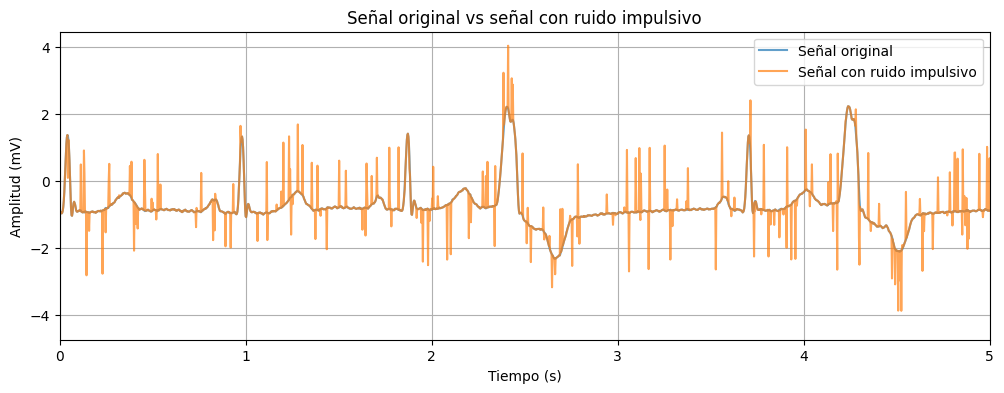

SNR con ruido impulsivo:8.32 dB


In [ ]:
# Parametro del ruido impulso
porcentaje_impulso = 0.1 # 10% de la señal
min_impulso = -2
max_impulso = 2 # amplitud maxima del impulso (mV)

# Crear muestra de ruido impulsivo (en algunos puntos aleatorios)
muestra_ruido = np.random.uniform(min_impulso, max_impulso, int(porcentaje_impulso*len(MliiSignal)))

# Crear arreglo de ceros para el resto de la señal
ceros = np.zeros(len(MliiSignal) - len(muestra_ruido))

#combinar impulsos y ceros
ruido = np.concatenate([muestra_ruido, ceros])

#Mezclar el ruido aleatoriamente
np.random.shuffle(ruido)

#Señal contaminada
signal_impulsiva = MliiSignal + ruido

#  Graficar
plt.figure(figsize=(12,4))
plt.plot(t, MliiSignal, label='Señal original', alpha=0.7)
plt.plot(t, signal_impulsiva, label='Señal con ruido impulsivo', alpha=0.7)
plt.xlim(0,5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Señal original vs señal con ruido impulsivo")
plt.legend()
plt.grid(True)
plt.show()

#  Calcular SNR
p_signal = np.mean(MliiSignal**2)                     # Potencia de la señal
p_noise = np.mean((signal_impulsiva - MliiSignal)**2) # potencia del ruido
SNR_dB = 10*np.log10(p_signal/p_noise)                # SNR en dB

print(f"SNR con ruido impulsivo:{SNR_dB:.2f} dB")

Contaminar la señal con ruido tipo artefacto y medir el SNR

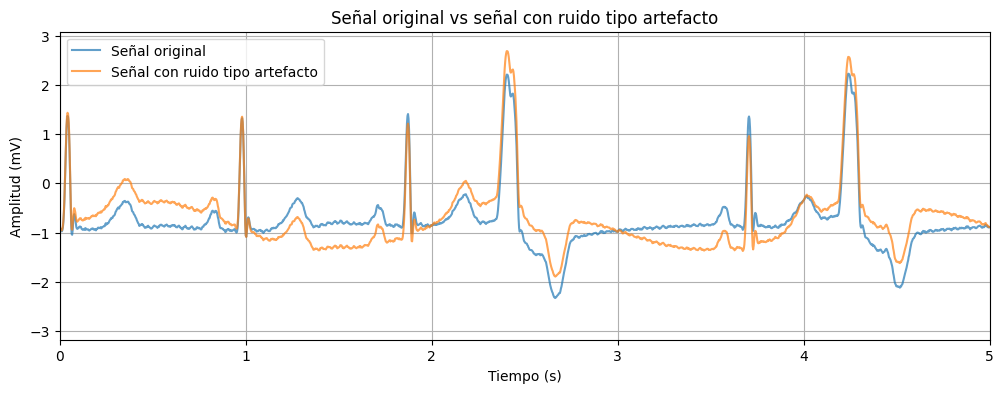

SNR con ruido tipo artefacto: 8.61 dB


In [ ]:
# Parametroa del ruido tipo artefacto
frecuacia_baja = 0.5 # frecuencia baja simulando movimiento
amplitud_art = 0.5 # amplitud del artefacto (mV)

# Crear el vector de tiempo
t_seg = np.array(t)

# Generar onda sinusoidal de baja frecuencia
ruido_artefacto = amplitud_art * np.sin(2*np.pi*frecuacia_baja*t_seg)

# Señal contaminada
signal_artefacto = MliiSignal + ruido_artefacto

# Graficar
plt.figure(figsize=(12,4))
plt.plot(t, MliiSignal, label='Señal original', alpha=0.7)
plt.plot(t, signal_artefacto, label='Señal con ruido tipo artefacto', alpha=0.7)
plt.xlim(0,5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Señal original vs señal con ruido tipo artefacto")
plt.legend()
plt.grid(True)
plt.show()

# Calcular SNR
p_signal = np.mean(MliiSignal**2)
p_noise = np.mean((signal_artefacto- MliiSignal)**2)
SNR_dB = 10 * np.log10(p_signal / p_noise)

print(f"SNR con ruido tipo artefacto: {SNR_dB:.2f} dB")